# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [67]:
# student 1: Nave 1452
# student 2: Ofir 9415

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [68]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
#קריאת הנתונים של הTEST והTRAIN
train_df=pd.read_csv('titanic_train.csv')
test_df=pd.read_csv('titanic_test.csv')
#הדפסת 5 שורות ראשונות של כל אחד מהם
print(f'5 rows of train set:\n\n{train_df.head()}\n\n5 rows of test set:\n\n{test_df.head()}')



5 rows of train set:

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

5 rows of test set:

   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


In [70]:
#ניקוי נתונים
# הסרת כפילויות
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

# טיפול בערכים חריגים (לדוגמה, גיל מחוץ לטווח הגיוני)
train_df = train_df[(train_df['Age'] >= 0) & (train_df['Age'] <= 120)]
test_df = test_df[(test_df['Age'] >= 0) & (test_df['Age'] <= 120)]

# טיפול בערכים חסרים (לדוגמה, מילוי ערכים חסרים בגיל עם הממוצע)
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)


In [71]:
#יצירת פיצ'רים חדשים
# הוספת פיצ'ר של גודל המשפחה (FamilySize)
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
# עדכון הפיצ'רים לתהליך האימון
Features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']

In [72]:
#EDA
#הדפסה של סטטיסטיקות של הTRAIN 
train_stats = train_df.describe(include='all')
train_stats_2 = train_df.corr()
print(f'\nTrain set statistics:\n 1- describe:\n {train_stats}\n 2- corr:\n{train_stats_2}')

#הדפסה של סטטיסטיקות של הTEST
test_stats = test_df.describe(include='all')
test_stats_2 = test_df.corr()
print(f'\nTest set statistics:\n 1- describe:\n {test_stats}\n 2- corr:\n{test_stats_2}')



Train set statistics:
 1- describe:
            Pclass         Sex         Age       SibSp       Parch        Fare  \
count  632.000000  632.000000  632.000000  632.000000  632.000000  632.000000   
mean     2.243671    0.618671   29.620597    0.552215    0.422468   34.860904   
std      0.859804    0.486098   13.778271    1.015160    0.835239   52.161783   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.000000    0.000000   21.750000    0.000000    0.000000    8.050000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   16.100000   
75%      3.000000    1.000000   36.000000    1.000000    1.000000   35.500000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  FamilySize  
count  632.000000  632.000000  632.000000  
mean     0.360759    0.419304    1.974684  
std      0.631637    0.493836    1.546734  
min      0.000000    0.000000    1.000000  
25%      0.0

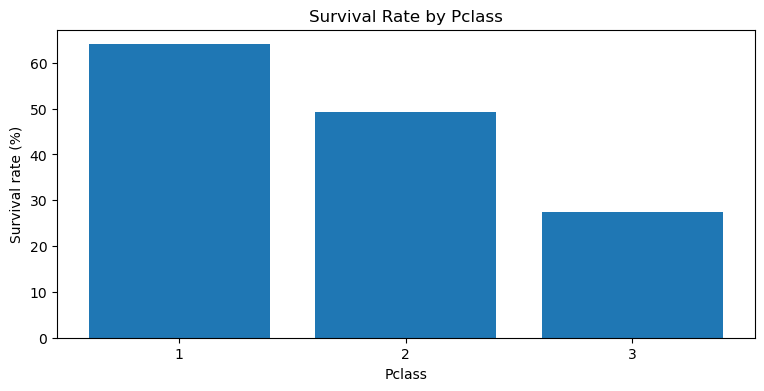

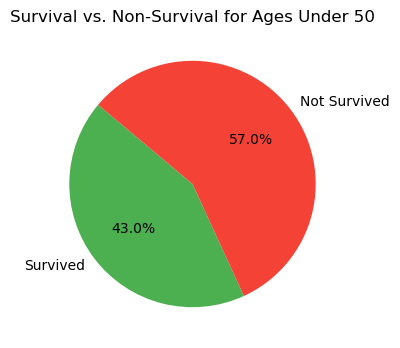

In [73]:
#EDA
#ויזואליזציות

# חישוב אחוז השורדים לפי מחלקה
survival_rates = train_df.groupby('Pclass')['Survived'].mean() * 100

# יצירת הגרף
plt.figure(figsize=(9, 4))
plt.bar(survival_rates.index.astype(str), survival_rates.values)
plt.xlabel('Pclass')
plt.ylabel('Survival rate (%)')
plt.title('Survival Rate by Pclass')

# הצגת התרשים
plt.show()


#השוואה בין שורדים ללא שורדים מתחת לגיל 50
#חישוב מספר השורדים והלא שורדים
under50_number= train_df[train_df['Age']<50]
survived_count=under50_number['Survived'].sum()
not_survived_count = len(under50_number) - survived_count

#נתוני תרשים העוגה
labels = ['Survived', 'Not Survived']
sizes = [survived_count,not_survived_count]

#יצירת תרשים העוגה
plt.figure(figsize = (9,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#F44336'])
plt.title('Survival vs. Non-Survival for Ages Under 50')

#הצגת התרשים
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [74]:
#הכנה של הנתונים לטובת האימון ללא סילום
Features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
x_noScaling_train = train_df[Features]
y_train = train_df['Survived']
x_noScaling_test = test_df[Features]
y_test = test_df['Survived']

#הצגת הנתונים של האימון והבדיקה ללא סילום
print(f'\nx train - no scaling:\n {x_noScaling_train.head().to_string(index=False)}')
print(f'\nx test - no scaling:\n {x_noScaling_test.head().to_string(index=False)}')



x train - no scaling:
  Pclass  Sex  Age  SibSp  Parch    Fare  Embarked
      1    0 54.0      1      0 78.2667         1
      2    0 45.0      0      0 13.5000         0
      3    1 20.0      0      0  9.5000         0
      3    1 36.0      0      0  7.8958         0
      3    1 22.0      0      0  8.0500         0

x test - no scaling:
  Pclass  Sex       Age  SibSp  Parch    Fare  Embarked
      3    1 35.000000      0      0  7.0500         0
      3    1 30.000000      0      0  7.2500         0
      3    1 29.699118      0      0 14.5000         0
      3    0 21.000000      0      0  7.7500         2
      3    1 32.000000      0      0 56.4958         0


In [75]:
#הכנת הנתונים עם סילום
scaler = StandardScaler()
x_scaled_train = scaler.fit_transform(x_noScaling_train)
x_scaled_test = scaler.transform(x_noScaling_test)


In [76]:
#לטובת הצגה ברורה יותר
#המרה של הנתונים לDataFrame
x_scaled_train_df = pd.DataFrame(x_scaled_train, columns=Features)
x_scaled_test_df = pd.DataFrame(x_scaled_test, columns=Features)

In [77]:
print(f'\n x train - scaling : {x_scaled_train_df.head().to_string(index=False)}')
print(f'\n x test - scaling : {x_scaled_test_df.head().to_string(index=False)}')


 x train - scaling :    Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
-1.447605 -1.273737  1.770811  0.441447 -0.506206  0.832797  1.012840
-0.283627 -1.273737  1.117091 -0.544400 -0.506206 -0.409837 -0.571603
 0.880350  0.785091 -0.698797 -0.544400 -0.506206 -0.486582 -0.571603
 0.880350  0.785091  0.463371 -0.544400 -0.506206 -0.517361 -0.571603
 0.880350  0.785091 -0.553526 -0.544400 -0.506206 -0.514402 -0.571603

 x test - scaling :  Pclass       Sex       Age   SibSp     Parch      Fare  Embarked
0.88035  0.785091  0.390736 -0.5444 -0.506206 -0.533589 -0.571603
0.88035  0.785091  0.027558 -0.5444 -0.506206 -0.529751 -0.571603
0.88035  0.785091  0.005703 -0.5444 -0.506206 -0.390651 -0.571603
0.88035 -1.273737 -0.626162 -0.5444 -0.506206 -0.520158  2.597283
0.88035  0.785091  0.172829 -0.5444 -0.506206  0.415094 -0.571603


In [78]:
#עץ החלטה
#הגדרת פרמטרים
decision_tree_param_grid = {'max_depth': [3,5,7,9], 'max_leaf_nodes': [10,20,30,40,50]}

#חיפוש איזה פרמטרים הכי טובים לעץ החלטה- עם סילום
dt_grid_search_scaled = GridSearchCV(DecisionTreeClassifier(), decision_tree_param_grid, cv=5, scoring='f1_macro')
dt_grid_search_scaled.fit(x_scaled_train, y_train)
dt_best_scaled = dt_grid_search_scaled.best_estimator_
dt_best_params_scaled = dt_grid_search_scaled.best_params_
test_preds_dt_scaled = dt_best_scaled.predict(x_scaled_test)

#חיפוש איזה פרמטרים הכי טובים לעץ החלטה- ללא סילום
dt_grid_search_no_scaling = GridSearchCV(DecisionTreeClassifier(),decision_tree_param_grid, cv=5, scoring='f1_macro')
dt_grid_search_no_scaling.fit(x_noScaling_train, y_train)
dt_best_no_scaling = dt_grid_search_no_scaling.best_estimator_
dt_best_params_no_scaling = dt_grid_search_no_scaling.best_params_
test_preds_dt_no_scaling = dt_best_no_scaling.predict(x_noScaling_test)


In [79]:
#הגדרת פרמטרים לKNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'minkowski']}

# חיפוש איזה פרמטרים הכי טובים לKNN - ללא סילום
knn_search_noScaling = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_param_grid, cv=5, scoring='f1_macro')
knn_search_noScaling.fit(x_noScaling_train, y_train)
best_knn_noScaling = knn_search_noScaling.best_estimator_
best_knn_params_noScaling = knn_search_noScaling.best_params_
predictions_knn_noScaling = best_knn_noScaling.predict(x_noScaling_test)
report_knn_noScaling = classification_report(y_test, predictions_knn_noScaling, target_names=['Not Survived', 'Survived'], zero_division=0)

# חיפוש איזה פרמטרים הכי טובים לKNN - עם סילום
knn_search_scaled = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=knn_param_grid, cv=5, scoring='f1_macro')
knn_search_scaled.fit(x_scaled_train, y_train)
best_knn_scaled = knn_search_scaled.best_estimator_
best_knn_params_scaled = knn_search_scaled.best_params_
predictions_knn_scaled = best_knn_scaled.predict(x_scaled_test)
report_knn_scaled = classification_report(y_test, predictions_knn_scaled, target_names=['Not Survived', 'Survived'], zero_division=0)

In [80]:
#חישוב הדיוק ודוחות הסיווג עבור עץ ההחלטה וKNN
#KNN עם סילום
accuracy_test_knn_scaled = accuracy_score(y_test, predictions_knn_scaled)
report_test_knn_scaled = classification_report(y_test, predictions_knn_scaled, target_names=['Not Survived', 'Survived'])

#KNN ללא סילום
accuracy_test_knn_no_scaling = accuracy_score(y_test, predictions_knn_noScaling)
report_test_knn_no_scaling = classification_report(y_test,predictions_knn_noScaling,target_names=['Not Survived', 'Survived'])

#עץ החלטה עם סילום
accuracy_test_dt_scaled = accuracy_score(y_test, test_preds_dt_scaled)
report_test_dt_scaled = classification_report(y_test,test_preds_dt_scaled, target_names=['Not Survived', 'Survived'])

#עץ החלטה ללא סילום
accuracy_test_dt_no_scaling = accuracy_score(y_test, test_preds_dt_no_scaling)
report_test_dt_no_scaling = classification_report(y_test, test_preds_dt_no_scaling,target_names=['Not Survived', 'Survived']) 

In [81]:
#הצגת תוצאות המודלים
print(f'\n התוצאות של KNN על קבוצת הבדיקה ללא סילום:\n דיוק : {accuracy_test_knn_no_scaling}')
print(report_test_knn_no_scaling)

print(f'\nKNN עם סילום - תוצאות על קבוצת הבדיקה:\n דיוק: {accuracy_test_knn_scaled}')
print(report_test_knn_scaled)

print(f'\nDecision Tree ללא סילום - תוצאות על קבוצת הבדיקה:\n דיוק: {accuracy_test_dt_no_scaling}')
print(report_test_dt_no_scaling)

print(f'\nDecision Tree עם סילום - תוצאות על קבוצת הבדיקה:\n דיוק: {accuracy_test_dt_scaled}')
print(report_test_dt_scaled)

# יצירת DataFrame להשוואת התוצאות
results = {
    'Model': ['KNN', 'KNN', 'Decision Tree', 'Decision Tree'],
    'Scaling': ['No', 'Yes', 'No', 'Yes'],
    'Accuracy': [
        accuracy_test_knn_no_scaling, 
        accuracy_test_knn_scaled, 
        accuracy_test_dt_no_scaling, 
        accuracy_test_dt_scaled
    ],
    'F1-Score': [
        classification_report(y_test, predictions_knn_noScaling, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, predictions_knn_scaled, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, test_preds_dt_no_scaling, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, test_preds_dt_scaled, output_dict=True)['macro avg']['f1-score']
    ]
}

results_df = pd.DataFrame(results)

# הצגת הטבלה של תוצאות המודלים בצורה מסודרת
print("\nהשוואת התוצאות בין המודלים עם וללא סילום:")
print(results_df.to_markdown(index=False))

# יצירת DataFrame להצגת הקומבינציות הטובות ביותר של hyperparameters
best_params_results = {
    'Model': [
        'KNN No Scaling', 
        'KNN Scaling', 
        'Decision Tree No Scaling', 
        'Decision Tree Scaling'
    ],
    'Best Hyperparameters': [
        best_knn_params_noScaling, 
        best_knn_params_scaled, 
        dt_best_params_no_scaling, 
        dt_best_params_scaled
    ]
}

best_params_df = pd.DataFrame(best_params_results)

# הצגת הטבלה של הקומבינציות הטובות ביותר של hyperparameters בצורה מסודרת
print("\nהקומבינציות הטובות ביותר של hyperparameters:")
print(best_params_df.to_markdown(index=False))



 התוצאות של KNN על קבוצת הבדיקה ללא סילום:
 דיוק : 0.688622754491018
              precision    recall  f1-score   support

Not Survived       0.76      0.76      0.76       107
    Survived       0.57      0.57      0.57        60

    accuracy                           0.69       167
   macro avg       0.66      0.66      0.66       167
weighted avg       0.69      0.69      0.69       167


KNN עם סילום - תוצאות על קבוצת הבדיקה:
 דיוק: 0.8203592814371258
              precision    recall  f1-score   support

Not Survived       0.86      0.86      0.86       107
    Survived       0.75      0.75      0.75        60

    accuracy                           0.82       167
   macro avg       0.80      0.80      0.80       167
weighted avg       0.82      0.82      0.82       167


Decision Tree ללא סילום - תוצאות על קבוצת הבדיקה:
 דיוק: 0.8143712574850299
              precision    recall  f1-score   support

Not Survived       0.85      0.86      0.86       107
    Survived       0.75 

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [88]:

# הגדרת המודל עם הפרמטרים המוצלחים ביותר
best_model_name = "KNN עם סילום"
best_params = {'metric': 'manhattan', 'n_neighbors': 7}

# הצגת המידע על הקומבינציה המוצלחת ביותר
print("\n--- מודל והפרמטרים שנבחרו ---")
print(f"מודל: {best_model_name}")
print(f"היפר-פרמטרים: {best_params}")
print("------------------------------")

# יצירת המודל עם ההיפר-פרמטרים שנבחרו
best_model = KNeighborsClassifier(
    metric=best_params['metric'],
    n_neighbors=best_params['n_neighbors']
)

# אימון המודל על נתוני האימון
best_model.fit(x_scaled_test_df, y_train)

# אישור שהמודל אומן בהצלחה
print("\n--- אימון המודל הושלם ---")
print("המודל אומן בהצלחה על נתוני האימון")
print("------------------------------")




--- מודל והפרמטרים שנבחרו ---
מודל: KNN עם סילום
היפר-פרמטרים: {'metric': 'manhattan', 'n_neighbors': 7}
------------------------------


ValueError: Found input variables with inconsistent numbers of samples: [167, 632]

## Part 5 - Apply on test and show model performance estimation

In [86]:

# חיזוי על קבוצת הבדיקה עם המודל הנבחר
test_predictions = best_model.predict(x_scaled_test_df)

# הצגת 10 התחזיות הראשונות על קבוצת הבדיקה
print("\n--- תחזיות ראשונות על קבוצת הבדיקה ---")
print(test_predictions[:10])  # הצגת 10 התחזיות הראשונות
print("----------------------------------------")

# הערכת איכות המודל על קבוצת הבדיקה
accuracy_on_test = accuracy_score(y_test, test_predictions)
report_dict = classification_report(
    y_test, 
    test_predictions, 
    target_names=['Not Survived', 'Survived'], 
    output_dict=True,
    zero_division=0  # הגדרת zero_division
)
report_df = pd.DataFrame(report_dict).transpose()

# שמירה על עמודות ה-precision, recall, f1-score, support והדפסה מסודרת
report_df = report_df[['precision', 'recall', 'f1-score', 'support']].loc[['Not Survived', 'Survived']]
report_df['support'] = report_df['support'].astype(int)  # המרת support לשלמים

# הדפסת דוח איכות המודל
print("\n--- דוח איכות המודל על קבוצת הבדיקה ---")
print(report_df)
print("----------------------------------------")

# הצגת הדיוק של המודל על קבוצת הבדיקה
print("\n--- דיוק המודל על קבוצת הבדיקה ---")
print(f"דיוק: {accuracy_on_test:.6f}")
print("----------------------------------------")



--- תחזיות ראשונות על קבוצת הבדיקה ---
[1 1 1 1 1 1 1 1 1 1]
----------------------------------------

--- דוח איכות המודל על קבוצת הבדיקה ---
              precision  recall  f1-score  support
Not Survived   0.000000     0.0  0.000000      107
Survived       0.359281     1.0  0.528634       60
----------------------------------------

--- דיוק המודל על קבוצת הבדיקה ---
דיוק: 0.359281
----------------------------------------
